# Part 3

## 0. Which table contains data with issues? What are all the issues you can identify in this table?

We start by importing the libraries we are going to use.

In [3]:
import pandas as pd
import numpy as np


First, we load the tables and conduct preliminary analysis to identify any issues. We inspect each table separately. In each table we iterate the same process:


* Load the table
* General info
* Preview first rows of the table
* Display descriptive statistics
* Check duplicated rows
* Check null values
* Trim string values and lowercase




### **POLICIES TABLE ANALYSIS**



In [4]:
policies = pd.read_csv('policies.csv', parse_dates=[2]) # parse 'date' column
policies.info()
policies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        4080 non-null   int64         
 1   price_id  4080 non-null   int64         
 2   date      4080 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 95.8 KB


,id,price_id,date
0,1777,9569,2022-04-13
1,2698,20597,2022-01-05
2,1315,4394,2021-10-23
3,1446,11273,2022-07-17
4,2784,12007,2022-05-23


In [5]:
policies.describe()

,id,price_id,date
count,4080.000000,4080.000000,4080
mean,2048.312990,14988.576716,2022-01-29 21:26:07.058823424
min,1.000000,22.000000,2021-07-05 00:00:00
25%,1024.750000,7633.750000,2021-11-11 00:00:00
50%,2047.500000,14966.000000,2022-01-29 00:00:00
75%,3074.250000,22311.500000,2022-05-01 00:00:00
max,4096.000000,29999.000000,2022-08-25 00:00:00
std,1182.948829,8617.233896,NaN


We look for duplicates.

In [6]:
policies.duplicated().sum()

np.int64(0)

We look for null values.

In [7]:
policies.isnull().sum()

,0
id,0
price_id,0
date,0


### **PRICES TABLE ANALYSIS**

In [8]:
prices = pd.read_csv('prices.csv')
prices.info()
prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30088 entries, 0 to 30087
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30088 non-null  int64  
 1   quote_id      30088 non-null  int64  
 2   product_type  30088 non-null  object 
 3   premium       30046 non-null  float64
 4   taxes         30088 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ MB


,id,quote_id,product_type,premium,taxes
0,5076,758,full,556.14,116.51
1,7104,4645,legal,25.00,1.71
2,20540,4422,legal,37.50,2.02
3,27857,6935,breakdown,22.90,5.09
4,11256,1527,legal,25.00,1.71


In [9]:
prices.describe()

,id,quote_id,premium,taxes
count,30088.000000,30088.000000,30046.000000,30088.000000
mean,14999.388494,4999.392981,138.142199,27.577632
std,8660.113371,2887.674626,208.465028,44.381939
min,1.000000,1.000000,16.890000,1.710000
25%,7498.750000,2498.750000,22.900000,1.710000
50%,15000.500000,4999.000000,25.000000,4.540000
75%,22499.250000,7500.000000,207.405000,43.410000
max,30000.000000,10000.000000,3388.940000,709.940000


In [10]:
prices.duplicated().sum()

np.int64(88)

As I have found that there are 88 rows duplicated, I'm going to take a look at them keeping all duplicated rows ordered by `id`.

In [11]:
prices[prices.duplicated(keep=False)].sort_values('id')

,id,quote_id,product_type,premium,taxes
487,465,72,legal,25.00,1.71
17417,465,72,legal,25.00,1.71
21054,666,9265,breakdown,16.89,4.54
20979,666,9265,breakdown,16.89,4.54
3917,912,5228,full,328.20,68.75
...,...,...,...,...,...
25710,28647,6714,legal,25.00,1.71
9818,29355,4179,full,101.20,21.20
2555,29355,4179,full,101.20,21.20
19898,29920,843,breakdown,16.89,4.54


I'm going to drop duplicated rows, keeping the last occurance, and double check if we still have duplicates in the table.

In [12]:
prices.drop_duplicates(keep='last', inplace=True)
prices.duplicated().sum()

np.int64(0)

In [13]:
len(prices) #It should be 30088 - 88 = 30000

30000

I am going to look for null values.

In [14]:
prices.isnull().sum()

,0
id,0
quote_id,0
product_type,0
premium,42
taxes,0


Let's dive into the `premium`column and filter by null values to inspect if there is any reason or pattern for those null values.

In [15]:
premium_nan = prices[prices['premium'].isnull()]
premium_nan.head()

,id,quote_id,product_type,premium,taxes
152,28842,5811,legal,NaN,2.27
245,27907,8790,full,NaN,48.46
1924,8447,7569,legal,NaN,2.27
1929,23527,9540,breakdown,NaN,5.09
2940,20979,4198,breakdown,NaN,5.09


I assume that `NaN` values in the column `premium` should not be part of the analysis, so I am going to drop those rows from the table and raise the problem to the sales team sending them `premium_nan` info.

In [16]:
prices.dropna(subset=['premium'], inplace=True)

prices.head()

,id,quote_id,product_type,premium,taxes
0,5076,758,full,556.14,116.51
1,7104,4645,legal,25.00,1.71
2,20540,4422,legal,37.50,2.02
3,27857,6935,breakdown,22.90,5.09
4,11256,1527,legal,25.00,1.71


We are going to inspect `product_type` column looking for trim spaces, and then we will change the data type to `category`.

In [17]:
prices['product_type'].str.strip()
prices['product_type'].str.strip().value_counts()

,count
product_type,
full,9986
breakdown,9981
legal,9978
none,13


In [18]:
prices[prices['product_type'] == 'none']

,id,quote_id,product_type,premium,taxes
2509,4367,5086,none,169.37,35.48
2782,5969,1004,none,16.89,4.54
5315,5584,1598,none,321.09,67.26
14235,4777,7156,none,1105.26,231.54
17877,11792,2859,none,16.89,4.54
18720,21563,2588,none,46.13,1.71
19220,22937,7701,none,37.50,2.02
21922,9868,4855,none,69.23,2.27
23644,1949,6022,none,491.31,102.92
24359,28855,2863,none,46.13,1.71


The information we received says that the colum `product_type`can only be: `breakdown`, `full`or `legal`. For that reason, we are going to drop rows with `none`as `product type`.

In [19]:
prices = prices[prices['product_type'] != 'none']
prices.product_type.value_counts()

,count
product_type,
full,9986
breakdown,9981
legal,9978


### **QUOTES TABLE ANALYSIS**

In [20]:
quotes = pd.read_csv('quotes.csv', parse_dates=[1])
quotes.info()
quotes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  int64         
 1   date            10000 non-null  datetime64[ns]
 2   email           10000 non-null  object        
 3   vehicle_id      10000 non-null  int64         
 4   operation_type  10000 non-null  object        
 5   is_booked       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 468.9+ KB


,id,date,email,vehicle_id,operation_type,is_booked
0,7568,2021-11-04,email1134@domain.it,2954,default,0
1,8682,2022-04-06,email7514@domain.com,4042,forced,0
2,299,2021-09-17,email11804@domain.uk,3024,forced,1
3,4975,2022-03-03,email25549@domain.it,4275,automatic,0
4,8564,2021-08-21,email2617@domain.com,5044,default,0


In [21]:
quotes.describe()

,id,date,vehicle_id,is_booked
count,10000.00000,10000,10000.000000,10000.000000
mean,5000.50000,2021-12-21 06:49:40.800000,4126.175100,0.105300
min,1.00000,2021-07-01 00:00:00,1.000000,0.000000
25%,2500.75000,2021-09-22 00:00:00,1939.750000,0.000000
50%,5000.50000,2021-12-11 00:00:00,4022.500000,0.000000
75%,7500.25000,2022-04-01 06:00:00,6261.250000,0.000000
max,10000.00000,2022-06-30 00:00:00,8675.000000,1.000000
std,2886.89568,NaN,2503.203001,0.306955


In [22]:
quotes.duplicated().sum()

np.int64(0)

In [23]:
quotes.isnull().sum()

,0
id,0
date,0
email,0
vehicle_id,0
operation_type,0
is_booked,0


In [24]:
quotes['email'].str.strip().str.lower()
quotes['operation_type'].str.strip().str.lower()
quotes.head()

,id,date,email,vehicle_id,operation_type,is_booked
0,7568,2021-11-04,email1134@domain.it,2954,default,0
1,8682,2022-04-06,email7514@domain.com,4042,forced,0
2,299,2021-09-17,email11804@domain.uk,3024,forced,1
3,4975,2022-03-03,email25549@domain.it,4275,automatic,0
4,8564,2021-08-21,email2617@domain.com,5044,default,0


In [25]:
quotes.operation_type.value_counts()

,count
operation_type,
default,6997
automatic,2018
forced,985


We assume `operation_type` won't easily change in the future, so we are going swap its data type to `category`.

In [26]:
quotes['operation_type'] = quotes['operation_type'].astype('category')
quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  int64         
 1   date            10000 non-null  datetime64[ns]
 2   email           10000 non-null  object        
 3   vehicle_id      10000 non-null  int64         
 4   operation_type  10000 non-null  category      
 5   is_booked       10000 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 400.6+ KB


### **VEHICLES TABLE ANALYSIS**

In [27]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.info()
vehicles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8675 non-null   int64 
 1   vehicle_type  8675 non-null   object
 2   city          8675 non-null   object
dtypes: int64(1), object(2)
memory usage: 203.4+ KB


,id,vehicle_type,city
0,353,car,Milan
1,8348,car,Milan
2,5435,car,London
3,234,motorcycle,Madrid
4,1726,car,Milan


In [28]:
vehicles.describe()

,id
count,8675.000000
mean,4338.000000
std,2504.401126
min,1.000000
25%,2169.500000
50%,4338.000000
75%,6506.500000
max,8675.000000


In [29]:
vehicles.duplicated().sum()

np.int64(0)

In [30]:
vehicles['vehicle_type'].value_counts()

,count
vehicle_type,
car,7077
motorcycle,1312
van,286


In [31]:
vehicles['vehicle_type'].str.strip().str.lower()
vehicles.head()

,id,vehicle_type,city
0,353,car,Milan
1,8348,car,Milan
2,5435,car,London
3,234,motorcycle,Madrid
4,1726,car,Milan


In [32]:
vehicles['city'].value_counts()

,count
city,
Milan,3738
Rome,2635
London,1252
Madrid,1050


## 1. What are the most quoted vehicle_id and vehicle_type in H2 2021?

In [33]:
quotes_vehicles = pd.merge(
    quotes,
    vehicles,
    left_on = 'vehicle_id',
    right_on = 'id',
    suffixes = ('_quotes', '_vehicles'),
    how='inner')

quotes_vehicles_policies = pd.merge(
    quotes_vehicles,
    prices,
    left_on = 'id_quotes',
    right_on = 'id',
    suffixes = (('_quotes', '_vehicles'), '_prices'),
    how='inner')

quotes_vehicles_policies.head()

,id_quotes,date,email,vehicle_id,operation_type,is_booked,id_vehicles,vehicle_type,city,id,quote_id,product_type,premium,taxes
0,7568,2021-11-04,email1134@domain.it,2954,default,0,2954,car,Rome,7568,458,legal,25.00,1.71
1,8682,2022-04-06,email7514@domain.com,4042,forced,0,4042,car,Milan,8682,930,full,302.52,63.37
2,299,2021-09-17,email11804@domain.uk,3024,forced,1,3024,car,London,299,4225,breakdown,16.89,4.54
3,4975,2022-03-03,email25549@domain.it,4275,automatic,0,4275,car,Rome,4975,189,breakdown,16.89,4.54
4,8564,2021-08-21,email2617@domain.com,5044,default,0,5044,motorcycle,Milan,8564,4860,legal,25.00,1.71


In [34]:
quotes_vehicles_policies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_quotes       9984 non-null   int64         
 1   date            9984 non-null   datetime64[ns]
 2   email           9984 non-null   object        
 3   vehicle_id      9984 non-null   int64         
 4   operation_type  9984 non-null   category      
 5   is_booked       9984 non-null   int64         
 6   id_vehicles     9984 non-null   int64         
 7   vehicle_type    9984 non-null   object        
 8   city            9984 non-null   object        
 9   id              9984 non-null   int64         
 10  quote_id        9984 non-null   int64         
 11  product_type    9984 non-null   object        
 12  premium         9984 non-null   float64       
 13  taxes           9984 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(6),

In [35]:
quotes_vehicles_policies.duplicated().sum()

np.int64(0)

In [36]:
h2_2021 = quotes_vehicles_policies[(quotes_vehicles_policies['date'] < '2022-01-01') & (quotes_vehicles_policies['date'] > '2021-06-30')]
h2_2021.sort_values('premium', ascending=False)

,id_quotes,date,email,vehicle_id,operation_type,is_booked,id_vehicles,vehicle_type,city,id,quote_id,product_type,premium,taxes
9921,4446,2021-12-18,email7621@domain.it,6755,default,0,6755,car,Rome,4446,3915,full,2374.10,497.34
6031,3319,2021-10-29,email30576@domain.com,868,default,0,868,motorcycle,Milan,3319,8260,full,2335.55,489.27
6841,9249,2021-09-23,email2732@domain.com,6760,default,1,6760,car,Milan,9249,1214,full,1931.52,404.62
7000,6698,2021-11-05,email5188@domain.it,3225,default,0,3225,car,Rome,6698,8375,full,1621.42,339.67
3352,6788,2021-07-11,email983@domain.com,6145,forced,0,6145,car,Milan,6788,5856,full,1487.49,311.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,2051,2021-12-21,email8231@domain.com,2723,default,0,2723,motorcycle,Milan,2051,2107,breakdown,16.89,4.54
5853,2595,2021-08-03,email564@domain.com,6222,default,0,6222,van,Milan,2595,8480,breakdown,16.89,4.54
5846,4748,2021-10-25,email11684@domain.com,393,default,0,393,van,Milan,4748,8224,breakdown,16.89,4.54
5842,153,2021-09-24,email17298@domain.es,3394,default,0,3394,car,Madrid,153,7805,breakdown,16.89,4.54


In [37]:
h2_2021.isnull().sum()

,0
id_quotes,0
date,0
email,0
vehicle_id,0
operation_type,0
is_booked,0
id_vehicles,0
vehicle_type,0
city,0
id,0


In [38]:
h2_2021_max_quote = h2_2021.premium.max()
h2_2021_max_quote

2374.1

In [39]:
h2_2021_most_quoted = h2_2021[h2_2021['premium'] == h2_2021_max_quote]
h2_2021_most_quoted[['vehicle_id', 'premium']]

,vehicle_id,premium
9921,6755,2374.1


Now, I am going to calculate the most quoted vehicle_type in H2 2021.

In [40]:
h2_2021[['vehicle_type', 'premium']].groupby('vehicle_type').agg(
    {'premium': ['sum', 'mean']}
)

premium            
                    sum        mean
vehicle_type                       
car           599107.34  136.129820
motorcycle    123645.26  148.078156
van            23510.51  111.954810

## 2. What is the month with the highest increase in unique quoting customers with respect to the previous month?

I will measure the increase in unique customers in absolute and percentage terms.

First, I am going to aggregate all the dates under the same month into a single bin.

In [41]:
quotes_vehicles_policies['year_month'] = quotes_vehicles_policies['date'].dt.to_period('M')
df_monthly_customers = quotes_vehicles_policies.groupby('year_month')['id_quotes'].nunique().reset_index(name='count_customers')
df_monthly_customers


,year_month,count_customers
0,2021-07,850
1,2021-08,937
2,2021-09,960
3,2021-10,1020
4,2021-11,915
5,2021-12,764
6,2022-01,783
7,2022-02,501
8,2022-03,708
9,2022-04,1186


Next, I'm going to compare each month's data with that of the previous month and calculate the difference between them in absolute and percentage terms.




In [42]:
df_monthly_customers['prev_count'] = df_monthly_customers['count_customers'].shift(1)
df_monthly_customers['prev_count'] = pd.to_numeric(df_monthly_customers['prev_count'], errors='coerce', downcast="integer")
df_monthly_customers['diff'] = df_monthly_customers['count_customers'] - df_monthly_customers['prev_count']
df_monthly_customers['pct_change'] = df_monthly_customers['count_customers'].pct_change()
df_monthly_customers


,year_month,count_customers,prev_count,diff,pct_change
0,2021-07,850,NaN,NaN,NaN
1,2021-08,937,850.0,87.0,0.102353
2,2021-09,960,937.0,23.0,0.024546
3,2021-10,1020,960.0,60.0,0.062500
4,2021-11,915,1020.0,-105.0,-0.102941
5,2021-12,764,915.0,-151.0,-0.165027
6,2022-01,783,764.0,19.0,0.024869
7,2022-02,501,783.0,-282.0,-0.360153
8,2022-03,708,501.0,207.0,0.413174
9,2022-04,1186,708.0,478.0,0.675141


I am going to calculate the maximum figures for `diff` and `pct_change` columns.





In [43]:
max_diff = df_monthly_customers[['year_month', 'diff']][df_monthly_customers['diff'] == df_monthly_customers['diff'].max()]
max_diff

,year_month,diff
9,2022-04,478.0


In [44]:
max_pct_change = df_monthly_customers[['year_month', 'pct_change']][df_monthly_customers['pct_change'] == df_monthly_customers['pct_change'].max()]
max_pct_change

,year_month,pct_change
9,2022-04,0.675141


Let's see the results above graphically using Matplotlib.

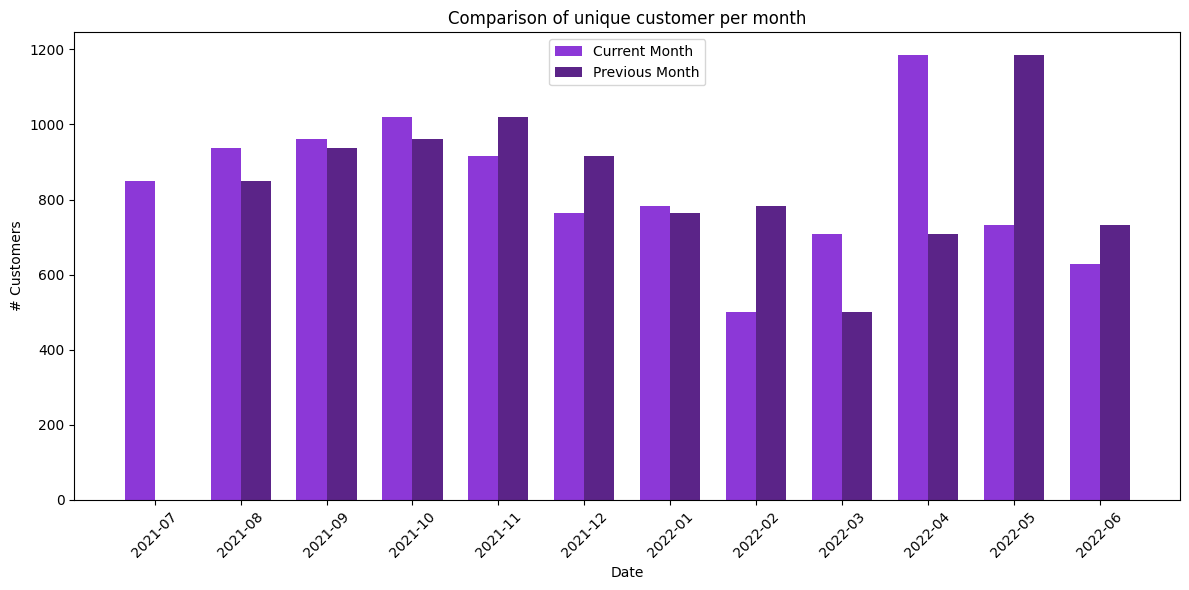

In [45]:
from matplotlib import pyplot as plt

df_monthly_customers['months'] = df_monthly_customers['year_month'].astype(str)

x = np.arange(len(df_monthly_customers))
width = 0.35

plt.figure(figsize=(12,6))

# Current month
plt.bar(x - width/2, df_monthly_customers['count_customers'], width, color='#8C38D7', label='Current Month')

# Previous month
plt.bar(x + width/2, df_monthly_customers['prev_count'], width, color='#5B2488', label='Previous Month')

plt.xlabel('Date')
plt.ylabel('# Customers')
plt.title('Comparison of unique customer per month')
plt.xticks(x, df_monthly_customers['months'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

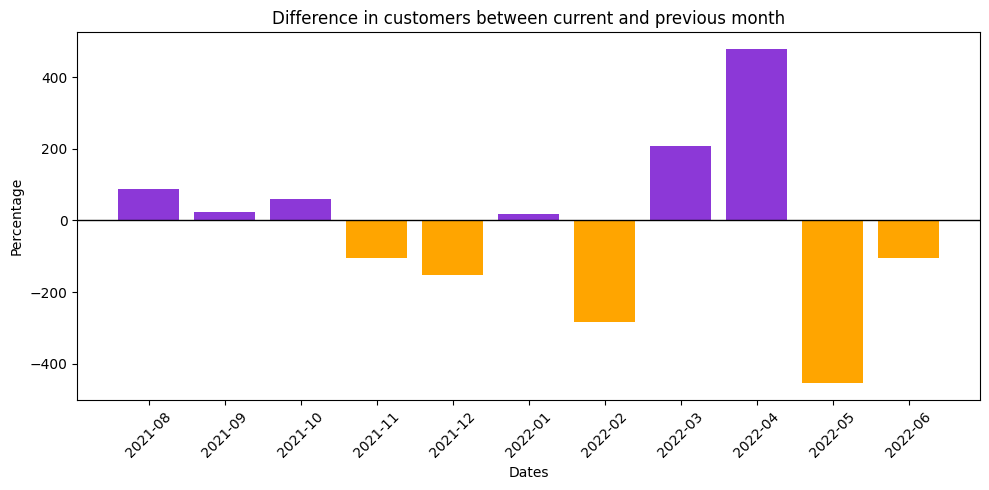

In [46]:
colors = df_monthly_customers['pct_change'].apply(
    lambda x: '#8C38D7' if x > 0 else 'orange')

plt.figure(figsize=(10,5))
plt.bar(df_monthly_customers['months'], df_monthly_customers['diff'], color = colors)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('Dates')
plt.ylabel('Percentage')
plt.title('Difference in customers between current and previous month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

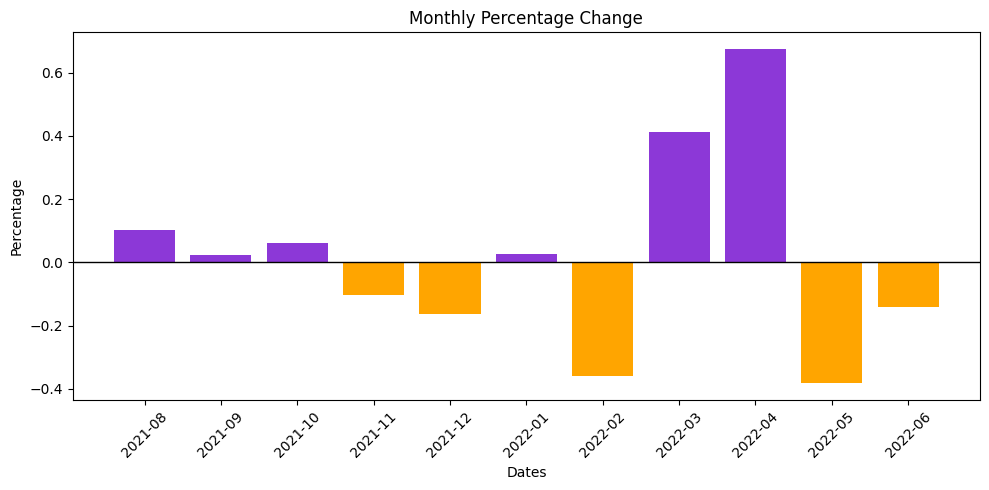

In [47]:
plt.figure(figsize=(10,5))
plt.bar(df_monthly_customers['months'], df_monthly_customers['pct_change'], color=colors)
plt.axhline(0, color='black', linewidth=1)

plt.xlabel('Dates')
plt.ylabel('Percentage')
plt.title('Monthly Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Which product_type has the highest conversion percentage (purchases / quotes)?

In [48]:
quotes_prices = pd.merge(
    quotes,
    prices,
    left_on = 'id',
    right_on = 'quote_id',
    suffixes = ('_quotes', '_prices')
    )

quotes_prices_policies = pd.merge(
    quotes_prices,
    policies,
    left_on = 'id_prices',
    right_on = 'price_id',
    suffixes = ('_quotes', '_policies'),
    how = 'left'
    )
quotes_prices_policies

,id_quotes,date_quotes,email,vehicle_id,operation_type,is_booked,id_prices,quote_id,product_type,premium,taxes,id,price_id,date_policies
0,7568,2021-11-04,email1134@domain.it,2954,default,0,4761,7568,legal,25.00,1.71,NaN,NaN,NaT
1,7568,2021-11-04,email1134@domain.it,2954,default,0,17464,7568,breakdown,16.89,4.54,NaN,NaN,NaT
2,7568,2021-11-04,email1134@domain.it,2954,default,0,2453,7568,full,547.61,114.72,NaN,NaN,NaT
3,8682,2022-04-06,email7514@domain.com,4042,forced,0,3974,8682,breakdown,16.89,4.54,NaN,NaN,NaT
4,8682,2022-04-06,email7514@domain.com,4042,forced,0,6509,8682,full,310.26,64.99,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29940,4381,2022-04-28,email5052@domain.it,5320,automatic,1,8673,4381,legal,25.00,1.71,NaN,NaN,NaT
29941,4381,2022-04-28,email5052@domain.it,5320,automatic,1,2641,4381,full,600.97,125.90,NaN,NaN,NaT
29942,2958,2022-02-15,email181@domain.it,4607,default,1,1599,2958,full,169.28,35.46,NaN,NaN,NaT
29943,2958,2022-02-15,email181@domain.it,4607,default,1,9465,2958,legal,25.00,1.71,NaN,NaN,NaT


In [49]:
df = quotes_prices_policies[['id_quotes', 'id_prices', 'product_type', 'id']]
df.rename(
    columns = {
        'id_prices' : 'id_quote_product',
        'id' : 'id_purchase'
    },
    inplace = True
)
df

/tmp/ipython-input-4165908587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


,id_quotes,id_quote_product,product_type,id_purchase
0,7568,4761,legal,NaN
1,7568,17464,breakdown,NaN
2,7568,2453,full,NaN
3,8682,3974,breakdown,NaN
4,8682,6509,full,NaN
...,...,...,...,...
29940,4381,8673,legal,NaN
29941,4381,2641,full,NaN
29942,2958,1599,full,NaN
29943,2958,9465,legal,NaN


Let's count the number of quotes created and the number of policies sold.

In [50]:
df_by_product_type = df.groupby('product_type').agg(
    {'id_quotes': 'nunique',
     'id_purchase': 'count'}
)
df_by_product_type

,id_quotes,id_purchase
product_type,,
breakdown,9981,1025
full,9986,1869
legal,9978,1186


In [51]:
df_by_product_type['conv_rate'] = df_by_product_type['id_purchase']/df_by_product_type['id_quotes']
df_by_product_type

,id_quotes,id_purchase,conv_rate
product_type,,,
breakdown,9981,1025,0.102695
full,9986,1869,0.187162
legal,9978,1186,0.118861


In [52]:
max_conv_rate = df_by_product_type[df_by_product_type['conv_rate'] == df_by_product_type['conv_rate'].max()]
max_conv_rate

,id_quotes,id_purchase,conv_rate
product_type,,,
full,9986,1869,0.187162
